# Ice Cream and Frozen Dessert Production Forecasting
## RNN Practice with Keras/Tensorflow


_


### Pronóstico de producción de helado y postres congelados

**Práctica de RNN con Keras/Tensorflow**


 ---
## Data | Datos
 
**Industrial Production: Manufacturing: Non-Durable Goods: Ice Cream and Frozen Dessert**
 
The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

__
 
El índice de producción industrial (IP) mide la producción real de todos los establecimientos relevantes ubicados en los Estados Unidos, independientemente de su propiedad, pero no los ubicados en los territorios de los EE. UU.

__

Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Frozen_Dessert_Production.csv')

In [3]:
df

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
568,2019-05-01,114.5613
569,2019-06-01,124.9605
570,2019-07-01,110.2632
571,2019-08-01,102.6085


In [6]:
type(df['DATE'][0])

str

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 2 columns):
DATE         573 non-null object
IPN31152N    573 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.1+ KB


**Dates are objects (str), we will turn them into DateTime objects**

Las fechas soon strings, las convertiremos en objetos DateTime

In [11]:
df = pd.read_csv('Frozen_Dessert_Production.csv', parse_dates=True, index_col='DATE')
df

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


**'IPN31152N' is not a very descriptive name**

'IPN31152N' no es un nombre muy descriptivo

In [12]:
df.columns

Index(['IPN31152N'], dtype='object')

In [14]:
df.columns = ['Production']

In [15]:
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


**That's better**👌

Así está mejor

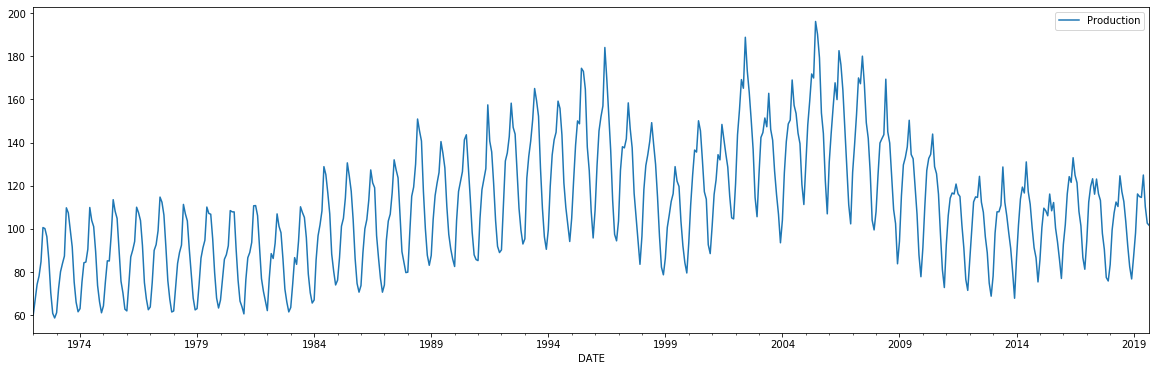

In [21]:
df.plot(figsize=(20,6));

In [22]:
len(df)

573

**Each row is a month. We will set the test set to be 24 months we can substract the number of months we set as test size from the len of df and that will be the train/test split index**

Cada fila es un mes. Estableceremos el test set para que sea de 24 meses. Podemos restar la cantidad de meses que establecemos como tamaño de prueba de la longitud de df y ese será el índice de división train/test.

In [23]:
test_size = 24
split_index = len(df) - test_size

In [24]:
train = df.iloc[:split_index]
test = df.iloc[split_index:]

In [26]:
len(train)

549

In [27]:
len(test)

24

In [28]:
len(df)

573

In [29]:
len(train) + len(test)

573

### Scaling | Escalamiento

**We will use a MinMaxScaler to scale our data**

Usaremos MinMaxScaler para escalar nuestros datos

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

### Generator | Generador

**We will use the TimeseriesGenerator approach to predict 18 months, we will set length to that**

Usaremos TimeseriesGenerator para predecir 18 meses, fijaremos length con ese valor

In [36]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [37]:
length = 18 

generator= TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

**We will make a validation generator to use it for validation data when we fit the data to the RNN**

Crearemos un generador de validación para usarlo como datos de validación cuando ajustemos los datos a la RNN

In [38]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                               length=length, batch_size=1)

---

## Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [40]:
n_features = 1 

model = Sequential()

model.add(LSTM(200, activation='relu', input_shape=(length, n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


**Callback for early stopping the training when given metric does not improve after a defined number of epochs patience**

Función para detener de manera temprana el entrenamiento cuando una métrica dada no mejora después de cierto número de epochs

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### Training | Entrenamiento

In [44]:
model.fit(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
531/531 [==============================] - 3s 3ms/step - loss: 0.0413 - val_loss: 0.0037
Epoch 2/20
531/531 [==============================] - 2s 3ms/step - loss: 0.0166 - val_loss: 0.0013
Epoch 3/20
531/531 [==============================] - 2s 3ms/step - loss: 0.0068 - val_loss: 0.0039
Epoch 4/20
531/531 [==============================] - 2s 3ms/step - loss: 0.0048 - val_loss: 0.0025


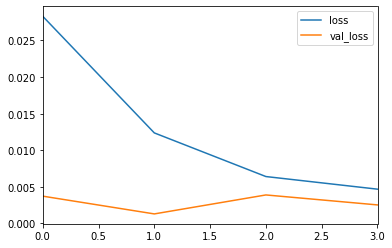

In [46]:
pd.DataFrame(model.history.history).plot()

### Test

**val_loss performance seems ok**

**Now to test the model we will grab a batch, with the size of length, of the last elements in the train set to use it within a for loop to predict a batch of new points with size len(test)**

El desempeño de val_loss se ve ok

Ahora para probar el modelo tomaremos un lote, del tamaño de length, de los últimos elementos en el train set para usarlo dentro de un loop for para predecir un lote de nuevos puntos con tamaño len(test)

In [49]:
scaled_train[-length:]

array([[0.4766849 ],
       [0.45728977],
       [0.54050318],
       [0.48134479],
       [0.45575247],
       [0.35906261],
       [0.31068714],
       [0.20365141],
       [0.16432593],
       [0.2587782 ],
       [0.39071032],
       [0.44387077],
       [0.4695409 ],
       [0.41743926],
       [0.46851409],
       [0.41889656],
       [0.39641011],
       [0.28544533]])

**scaled_train[-length:] gives us a batch, with the size of length, of the last elements in the train set**

scaled_train[-length:] nos da un lote, del tamaño de length, de los últimos elementos en el train set 

In [50]:
eval_batch = scaled_train[-length:]

**If we pass this batch to model.predict() it will predict just a new point, but we must reshape it first to the shape model.predict() expects  (1 , length, n_features)**

Si pasamos este batch a .predict(), hará la predicción solo de un punto, un mes, pero antes debemos de transformarlo a la forma que .predict() espera (1 , length, n_features)

In [51]:
eval_batch.shape

(18, 1)

In [52]:
eval_batch = eval_batch.reshape(1 , length, n_features)
eval_batch.shape

(1, 18, 1)

In [53]:
model.predict(eval_batch)

array([[0.26338398]], dtype=float32)

### Loop to collect len(test) number of predictions

**We predict just one point, we want to predict len(test) numbers of points into the future (a cycle). We will use a for loop to do that.**

**For loop does the following:**

**- Grab the last points in the training batch and reshape it so the model can accept it**

**- From that batch make a prediction of the next point and append it to the test predictions list**

**- Then update/move the current batch to the next set of points**

**- Loop will do this fo every point in the test set [for i in range(len(test))]**

__

**Loop para colectar len(test) número de predicciones**

Predijimos solo un punto hacia el futuro, queremos predecir len(test) número de puntos hacia el futuro (un ciclo), usaremos un loop for para lograr eso.


El loop for hace lo siguiente:

- Toma los últimos puntos en el batch y remodelelos para que el modelo pueda aceptarlos

- A partir de ese batch, hace una predicción del siguiente punto y lo agrega a la lista de predicciones 

- Luego actualiza/mueve el batch al siguiente conjunto de puntos

- El loop hará esto para cada punto en el conjunto de prueba [for i in range(len(test))]

In [55]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

**How does the update step work?**


current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


**np.append appends elements to a given array**

**current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)**

**For every cycle in the loop, np.append updates the current_batch with a new current_batch consisting of the previous batch without the first element and with the next value appended**

_

**Cómo funciona el último paso?**

current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

current_batch[:,1:,:] regresa el batch sin el primer elemento

np.append agrega elementos a un arreglo dado

Para cada ciclo en el loop, np.append actualiza current_batch con un nuevo current_batch que consiste en el batch anterior sin el primer elemento y con el siguiente valor agregado


### Predictions

In [57]:
test_predictions

[array([0.26338398], dtype=float32),
 array([0.21361549], dtype=float32),
 array([0.23774399], dtype=float32),
 array([0.32165715], dtype=float32),
 array([0.39050764], dtype=float32),
 array([0.44392264], dtype=float32),
 array([0.47821423], dtype=float32),
 array([0.50002253], dtype=float32),
 array([0.49627706], dtype=float32),
 array([0.4541172], dtype=float32),
 array([0.38688692], dtype=float32),
 array([0.317274], dtype=float32),
 array([0.26324385], dtype=float32),
 array([0.26096323], dtype=float32),
 array([0.3368403], dtype=float32),
 array([0.40890974], dtype=float32),
 array([0.46986234], dtype=float32),
 array([0.5211653], dtype=float32),
 array([0.54886645], dtype=float32),
 array([0.55802727], dtype=float32),
 array([0.5374639], dtype=float32),
 array([0.48489964], dtype=float32),
 array([0.41701037], dtype=float32),
 array([0.34831363], dtype=float32)]

**These predictions were made using scaled data, to get the real predictions we gotta invert the scaling**

Estas predicciones fueron hechas usando datos escalados, para obtener las predicciones reales tenemos que invertir el escalamiento

In [58]:
scaler.inverse_transform(test_predictions)

array([[ 94.87875892],
       [ 88.0348994 ],
       [ 91.35290308],
       [102.89212929],
       [112.36002834],
       [119.70533337],
       [124.42090437],
       [127.41984826],
       [126.90479456],
       [121.10722843],
       [111.86212985],
       [102.28938569],
       [ 94.85948902],
       [ 94.5458717 ],
       [104.98002357],
       [114.89057283],
       [123.2724031 ],
       [130.32727451],
       [134.13656623],
       [135.39630585],
       [132.56855747],
       [125.34024062],
       [116.0045219 ],
       [106.55776563]])

In [59]:
real_predictions = scaler.inverse_transform(test_predictions)

**Now we can add these predictions to our test data set for easier handling**

Ahora podemos agregar estas predicciones a nuestro test set para un mejor manejo

In [60]:
test

,Production
DATE,
2017-10-01,90.4732
2017-11-01,77.4378
2017-12-01,75.8118
2018-01-01,83.4343
2018-02-01,99.4899
2018-03-01,107.3152
2018-04-01,112.4309
2018-05-01,110.3544
2018-06-01,124.5841


In [62]:
test['Predictions'] = real_predictions
test

C:\Users\USER\anaconda3\envs\tfenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Production,Predictions
DATE,,
2017-10-01,90.4732,94.878759
2017-11-01,77.4378,88.034899
2017-12-01,75.8118,91.352903
2018-01-01,83.4343,102.892129
2018-02-01,99.4899,112.360028
2018-03-01,107.3152,119.705333
2018-04-01,112.4309,124.420904
2018-05-01,110.3544,127.419848
2018-06-01,124.5841,126.904795


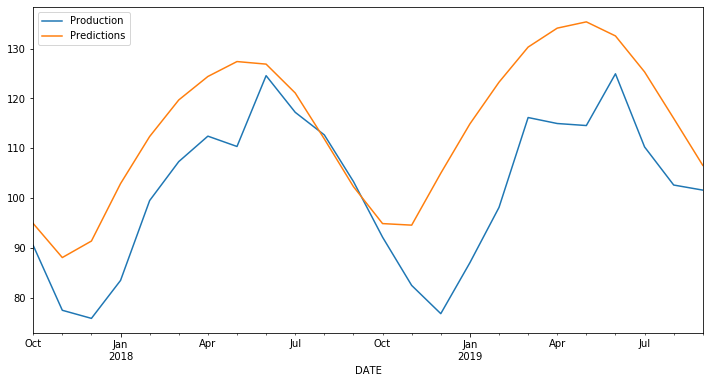

In [63]:
test.plot(figsize=(12,6));

### RMSE

In [77]:
from sklearn.metrics import mean_squared_error

In [79]:
np.sqrt(mean_squared_error(test['Production'], test['Predictions']))

14.973348704232803

In [80]:
test['Production'].mean()

101.50429166666667

---

## Retrain and Forecasting

**When we are ok with the performance we retrain over the full dataset to make a forecasting**

Cuando estemos ok con el desempeño del modelo, re entramos sobre el dataset completo para hacer un pronóstico


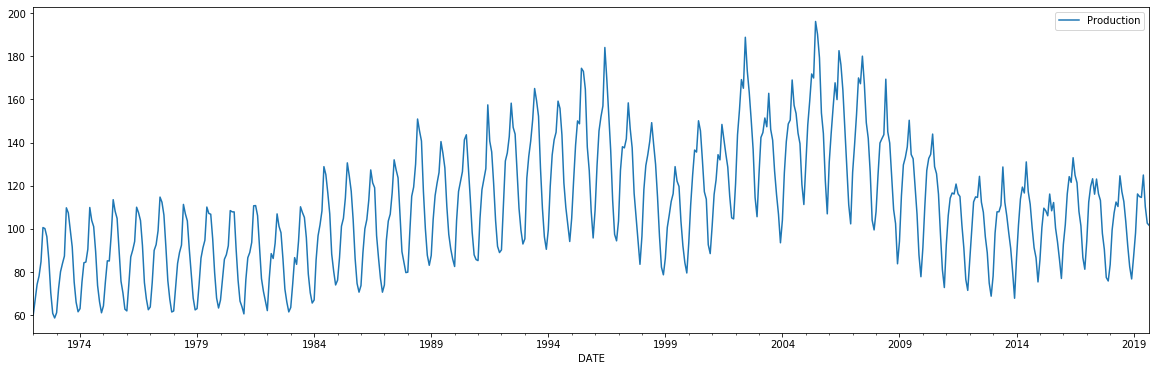

In [64]:
df.plot(figsize=(20,6));

In [66]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [67]:
n_features = 1 
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator, epochs=4)

Epoch 1/4
555/555 [==============================] - 3s 3ms/step - loss: 0.0426
Epoch 2/4
555/555 [==============================] - 2s 3ms/step - loss: 0.0124
Epoch 3/4
555/555 [==============================] - 2s 3ms/step - loss: 0.0056
Epoch 4/4
555/555 [==============================] - 2s 3ms/step - loss: 0.0045


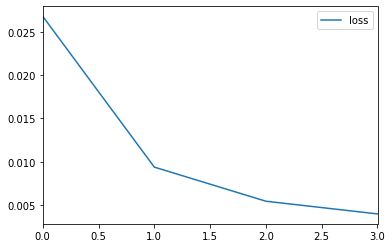

In [68]:
pd.DataFrame(model.history.history).plot()

**Now we use a similar loop to get the forecasted values**

Usamos un loo similar para obtener los valores del pronóstico

In [70]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 18

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

**Re scale the forecast data**

Re escala los datos del pronóstico

In [71]:
forecast = full_scaler.inverse_transform(forecast)

**Now make a DataFrame with the forecasted values and the corresponding dates as index**

Ahora hacemos un DataFrame con los valores pronosticados y las correspondientes fechas como índice

In [72]:
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [73]:
forecast_index = pd.date_range(start='2019-10-01', periods=periods, freq='MS')

In [74]:
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])
forecast_df

,Forecast
2019-10-01,89.654634
2019-11-01,81.448921
2019-12-01,78.840201
2020-01-01,87.664140
2020-02-01,98.539002
2020-03-01,107.374171
2020-04-01,113.444687
2020-05-01,116.599721
2020-06-01,115.729346
2020-07-01,110.980395


**Plot the original DataFrame along the Forecast in the same plot**

Grafica el DataFrame original junto al Forecast en la misma gráfica

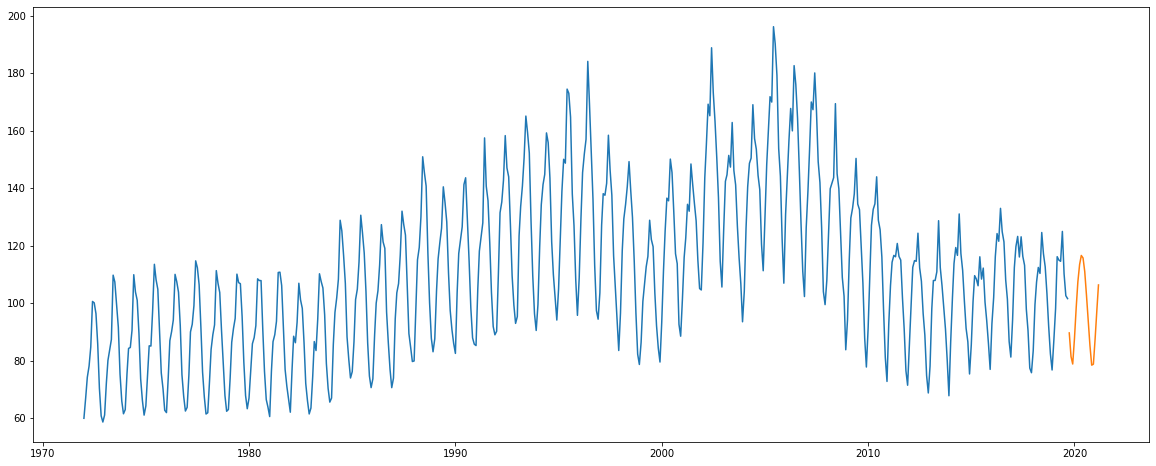

In [82]:
plt.figure(figsize=(20,8))
plt.plot(df)
plt.plot(forecast_df)